In [294]:
import pandas as pd 
import numpy as np
# use kmeans and plot the cluster 
from sklearn.cluster import KMeans
pd.options.mode.chained_assignment = None
import plotly.express as px
import matplotlib.pyplot as plt

In [295]:
df = pd.read_csv('mac_data.csv')

In [296]:
df.head()

,Keycode,Keyname,Keycount
0,49,1,0
1,50,2,0
2,51,3,1
3,52,4,0
4,53,5,0


In [297]:
# we don't need the keycode
df = df.drop('Keycode', axis=1)

In [298]:
df.head()

,Keyname,Keycount
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0


In [299]:
#assign 1 to first row of the keyboard 
# assign 2 to second row of the keyboard
# assign 3 to third row of the keyboard (only for macbook pro characters)

df['Row'] = 0

first_row = ['Q', 'W', 'E', 'R', 'T', 'Y', 'U', 'I', 'O', 'P']
second_row = ['A', 'S', 'D', 'F', 'G', 'H', 'J', 'K', 'L']
third_row = ['Z', 'X', 'C', 'V', 'B', 'N', 'M']


In [300]:
for i in range(len(df)):
    if df['Keyname'][i] in first_row:
        df['Row'][i] = 1
    elif df['Keyname'][i] in second_row:
        df['Row'][i] = 2
    elif df['Keyname'][i] in third_row:
        df['Row'][i] = 3
    else: 
        df['Row'][i] = None

In [301]:

#if the row is none, drop it
df = df.dropna()

# export to csv to see 
#do kmeans on keycount and row
kmeans = KMeans(n_clusters=3, random_state=0).fit(df[['Keycount', 'Row']])

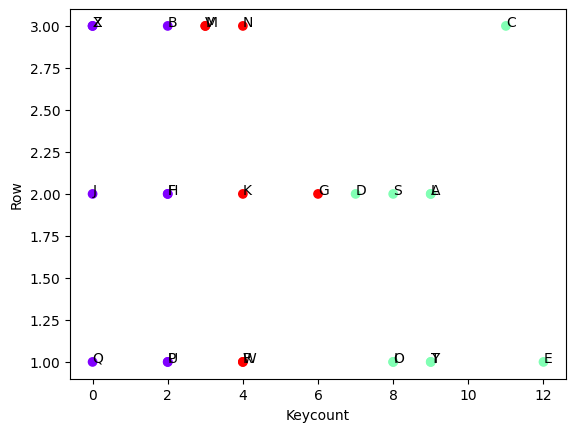

In [302]:
# plot the cluster
plt.scatter(df['Keycount'], df['Row'], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('Keycount')
plt.ylabel('Row')
# write the file to output.png

df.head()
# reassign the indexes 
df = df.reset_index(drop=True)

# add the keyname to the annotation 
for i in range(len(df)):
   plt.annotate(df['Keyname'][i], (df['Keycount'][i] , df['Row'][i] ) )

# readjust the axis
plt.savefig('output.png')

![alt](./output.png)